# Imports

In [1]:
import sys
 
# setting path
sys.path.append('..')

In [2]:
from model_builder import ModelBuilder
import matplotlib.pyplot as plt

# Model

In [3]:
model_builder = ModelBuilder()

# Create Dataset

In [4]:
response_variable=['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested']
feature_names=['aspect', 'brazil_agriculture', 'brazil_pasture', 'brazil_protected_areas', 'brazil_roads',
                'brazil_surrounding_forest', 'elevation', 'forest_age', 'hillshade', 'population_density','slope', 
                'south_america_rivers'] # TODO add urbanisation!
# ['aspect', 'brazil_agriculture', 'brazil_pasture', 'brazil_protected_areas', 'brazil_roads', 'brazil_surrounding_forest', 
#  'elevation', 'forest_age', 'hillshade', 'population_density', 'slope', 'south_america_rivers', 'urban_distance', 'urbanization']
gcp_bucket= 'eartshot-science-team'
gcp_folder_name= 'deforestation_risk'
samples_folder_name= f'Brazil_samples_csv_scale30_2000numPixels'
name_csv_samples_merged_file = 'Brazil_samples_csv_scale30_2000numPixels_val_test_set_10km_buffer.csv'

In [5]:
model_builder.create_dataset(response_variable=response_variable, 
                             feature_names=feature_names, 
                             gcp_bucket=gcp_bucket, 
                             gcp_folder_name=gcp_folder_name, 
                             samples_folder_name= samples_folder_name, 
                             name_csv_samples_merged_file = name_csv_samples_merged_file, 
                             use_test_val_buffered_sets = True)

Reading sample csv file: gs://eartshot-science-team/deforestation_risk/Brazil_samples_csv_scale30_2000numPixels/Brazil_samples_csv_scale30_2000numPixels_val_test_set_10km_buffer.csv...
We have 63370 samples
Training samples: 54088
Test samples: 2622
Validation samples: 5411


In [6]:
model_builder.X_train

,aspect,brazil_agriculture,brazil_pasture,brazil_protected_areas,brazil_roads,brazil_surrounding_forest,elevation,forest_age,hillshade,population_density,slope,south_america_rivers
0,180,212,78,109712.133366,2059.594880,373,327,33,180,9.575759,1,1316.031874
1,125,0,0,90665.930351,2686.635860,632,378,45,175,1.663822,2,333.560628
2,226,104,16,91543.393534,2009.592253,578,280,44,216,5.653796,16,1589.520977
3,237,27,15,91822.437423,1612.808558,821,278,50,214,8.751178,13,229.399492
4,209,43,137,81256.291754,2704.533407,465,305,45,199,9.973743,12,1891.368453
...,...,...,...,...,...,...,...,...,...,...,...,...
63365,200,0,467,23328.517233,2953.221836,482,1078,13,201,6.833838,19,2560.061161
63366,217,16,819,46796.471677,641.056378,126,925,14,193,5.362491,7,217.691384
63367,180,10,421,32755.737679,370.995709,530,818,14,180,12.726709,4,52.345135
63368,194,42,556,42055.672386,1974.932232,363,985,16,188,22.387053,9,14.384899


In [7]:
model_builder.y_train

,Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested
0,0
1,0
2,1
3,0
4,0
...,...
63365,0
63366,0
63367,0
63368,0


In [15]:
nb_forest_samples = model_builder.y_train[model_builder.y_train['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'] == 0]['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'].count()
nb_deforested_samples = model_builder.y_train[model_builder.y_train['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'] == 1]['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in training set')

nb_forest_samples = model_builder.y_val[model_builder.y_val['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'] == 0]['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'].count()
nb_deforested_samples = model_builder.y_val[model_builder.y_val['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'] == 1]['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in validation set')

nb_forest_samples = model_builder.y_test[model_builder.y_test['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'] == 0]['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'].count()
nb_deforested_samples = model_builder.y_test[model_builder.y_test['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'] == 1]['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested'].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in test set')


There are 50780 forest samples and 3308 deforested samples in training set
There are 5102 forest samples and 309 deforested samples in validation set
There are 2398 forest samples and 224 deforested samples in test set


In [7]:
# Training Predictors samples 
model_builder.X_train.shape

(54088, 12)

In [7]:
# Training Response samples 
model_builder.y_train.shape

(54088, 1)

In [8]:
# Validation Predictors samples 
model_builder.X_val.shape

(5411, 12)

In [9]:
# Validation Response samples 
model_builder.y_val.shape

(5411, 1)

In [10]:
model_builder.feature_names

['aspect',
 'brazil_agriculture',
 'brazil_pasture',
 'brazil_protected_areas',
 'brazil_roads',
 'brazil_surrounding_forest',
 'elevation',
 'forest_age',
 'hillshade',
 'population_density',
 'slope',
 'south_america_rivers']

In [11]:
model_builder.response_variable

['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested']

# Hyperparameters tuning

Finding best hyperparameters with GridSearch

In [9]:
best_params = model_builder.grid_search(n_estimators=[100, 200, 500], 
                                        max_features=['sqrt', 'log2'], 
                                        max_depth=[4,5,6,7,8], 
                                        criterion=['squared_error', 'absolute_error'], 
                                        random_state=42)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [10]:
best_params

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

# Training

In [12]:
model_builder.initialize_model(nb_trees=100, max_depth=5, random_state=42, max_features='sqrt', n_cores=-1, 
                               oob_score=True, bootstrap=True, criterion='squared_error')

In [13]:
model_builder.model

RandomForestRegressor(max_depth=5, max_features='sqrt', n_jobs=-1,
                      oob_score=True, random_state=42, verbose=1)

In [14]:
model_builder.train()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


# Evaluation


Evaluation...



Mean Absolute Error (MAE): 0.11421782170111655
Mean Squared Error (MSE): 0.05366851799854114
Root Mean Squared Error (RMSE): 0.2316646671345053
OOB prediction of accuracy is: 1.5509635635370445%

R2: 0.003274115064741401


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


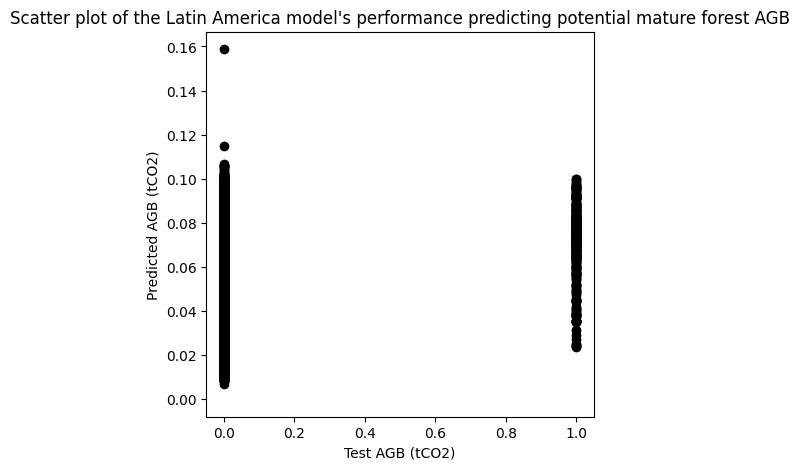

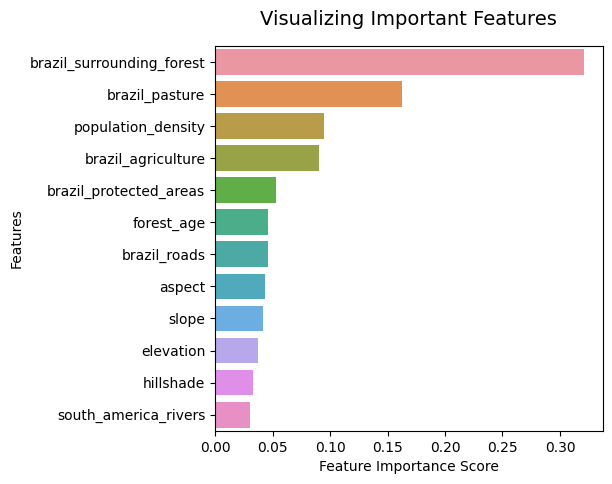

In [15]:
# On validation set
y_pred_val, mae_val, mse_val, rmse_val, oob_score_val, r2_val, feature_imp_val = model_builder.evaluate(X_test=model_builder.X_val,
                                                                    y_test=model_builder.y_val,
                                                                    save_figures=False, saving_base_output_name='testing_val_set')


Evaluation...



Mean Absolute Error (MAE): 0.13848778294911515
Mean Squared Error (MSE): 0.07823501111128532
Root Mean Squared Error (RMSE): 0.2797052218162638
OOB prediction of accuracy is: 1.5509635635370445%

R2: -0.0013117816349890177


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


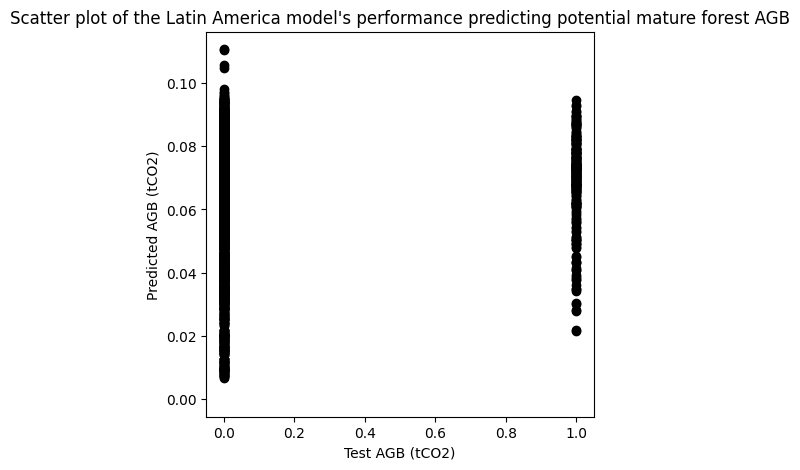

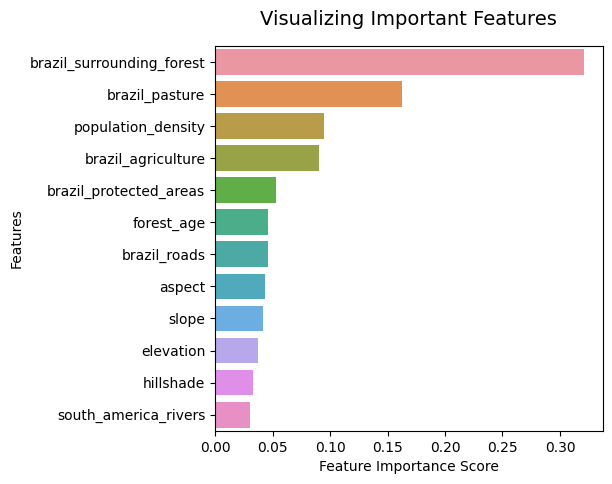

In [16]:
# On test set
y_pred_test, mae_test, mse_test, rmse_test, oob_score_test, r2_test, feature_imp_test = model_builder.evaluate(X_test=model_builder.X_test,
                                                                    y_test=model_builder.y_test,
                                                                    save_figures=False, saving_base_output_name='testing_test_set')

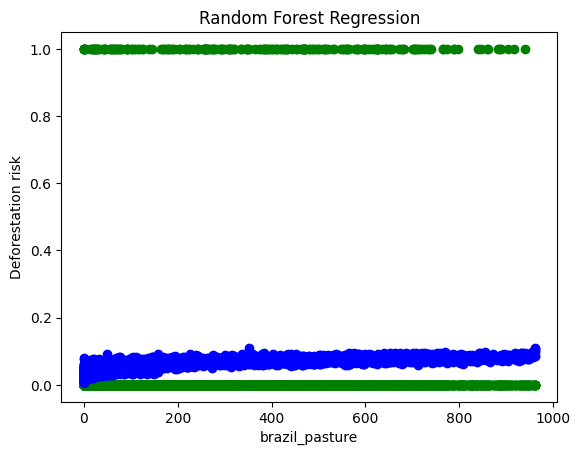

In [18]:
plt.scatter(model_builder.X_test['brazil_pasture'].values, model_builder.y_test, color = 'green')
plt.scatter(model_builder.X_test['brazil_pasture'].values, y_pred_test, color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('brazil_pasture')
plt.ylabel('Deforestation risk')
plt.show()

# Inference on tiles

In [ ]:
model_builder.inference(mask_band='forest_age', 
                        tiles_folder_name='Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster', 
                        tiles_in_GCP=False,   # Running locally
                        RF_output_folder_temp='TEST_RF_outputs_temp',
                        path_to_tiles_local='/Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster'
                       )


There are 58 inference tiles

Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_52.tif
Image opened
tile shape: (7422, 6857, 12)
Reshaped from (7422, 6857, 12) to (50892654, 12)
(50892654, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   30.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.6min finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (7422, 6857)
[ 0 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 86 91 93]
(7422, 6857)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_29_49_0.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_46.tif
Image opened
tile shape: (2665, 3127, 12)
Reshaped from (2665, 3127, 12) to (8333455, 12)
(8333455, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (2665, 3127)
[ 0 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49]
(2665, 3127)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_29_58_1.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_8.tif
Image opened
tile shape: (7422, 7422, 12)
Reshaped from (7422, 7422, 12) to (55086084, 12)
(55086084, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   21.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.6min finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (7422, 7422)
[ 0 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66]
(7422, 7422)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_33_05_2.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_9.tif
Image opened
tile shape: (7422, 7422, 12)
Reshaped from (7422, 7422, 12) to (55086084, 12)
(55086084, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   29.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.5min finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (7422, 7422)
[ 0 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68]
(7422, 7422)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_36_23_3.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_47.tif
Image opened
tile shape: (7422, 7422, 12)
Reshaped from (7422, 7422, 12) to (55086084, 12)
(55086084, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   32.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.6min finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (7422, 7422)
[ 0  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72 73 78 81]
(7422, 7422)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_40_03_4.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_53.tif
Image opened
tile shape: (7422, 7423, 12)
Reshaped from (7422, 7423, 12) to (55093506, 12)
(55093506, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   34.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.7min finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (7422, 7423)
[ 0 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
(7422, 7423)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_44_01_5.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_45.tif
Image opened
tile shape: (4900, 7422, 12)
Reshaped from (4900, 7422, 12) to (36367800, 12)
(36367800, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   14.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   27.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (4900, 7422)
[ 0  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48]
(4900, 7422)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_45_40_6.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_51.tif
Image opened
tile shape: (4242, 4779, 12)
Reshaped from (4242, 4779, 12) to (20272518, 12)
(20272518, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (4242, 4779)
[ 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65]
(4242, 4779)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_46_34_7.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_50.tif
Image opened
tile shape: (1534, 511, 12)
Reshaped from (1534, 511, 12) to (783874, 12)
(783874, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (1534, 511)
[0]
(1534, 511)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_46_35_8.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_44.tif
Image opened
tile shape: (7423, 7422, 12)
Reshaped from (7423, 7422, 12) to (55093506, 12)
(55093506, 12)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   30.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.6min finished


Class prediction was successful without slicing!
No slicing was necessary!
Reshaped back to (7423, 7422)
[  0   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  93  97  99 101]
(7423, 7422)
Image saved to: TEST_RF_outputs_temp/RF_output_2022-11-17-10_49_44_9.tif




Starting image: /Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_2degrees_grid_scale30_with_spawn_as_base_raster/inference_tiles_scale30_40.tif
Image opened
